In [1]:
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities

#pip install python-louvain
import community

import matplotlib.pyplot as plt

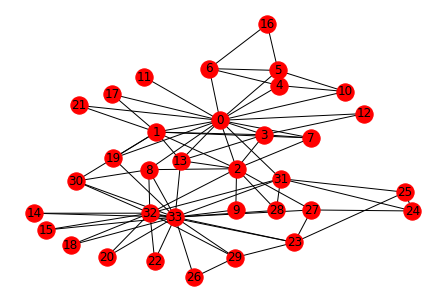

In [2]:
G = nx.karate_club_graph()

#Draw Graph
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, pos = pos, node_color="#ff0000")

### Clauset-Newman-Moore Greedy Modularity
Find communities in graph using Clauset-Newman-Moore greedy modularity maximization. This method currently supports the Graph class and does not consider edge weights.

In [3]:
#Find communities
c = list(greedy_modularity_communities(G, weight="weight"))
print(c)

#Transform communities to dictionary
partition = {}
for i,comm in enumerate([list(el) for el in c]):
    for el in comm:
        partition[el] = i

#Now sort by node number
partition = dict(sorted(partition.items()))
print("\n", partition)

[frozenset({32, 33, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}), frozenset({1, 2, 3, 7, 9, 12, 13, 17, 21}), frozenset({0, 4, 5, 6, 10, 11, 16, 19})]

 {0: 2, 1: 1, 2: 1, 3: 1, 4: 2, 5: 2, 6: 2, 7: 1, 8: 0, 9: 1, 10: 2, 11: 2, 12: 1, 13: 1, 14: 0, 15: 0, 16: 2, 17: 1, 18: 0, 19: 2, 20: 0, 21: 1, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0}


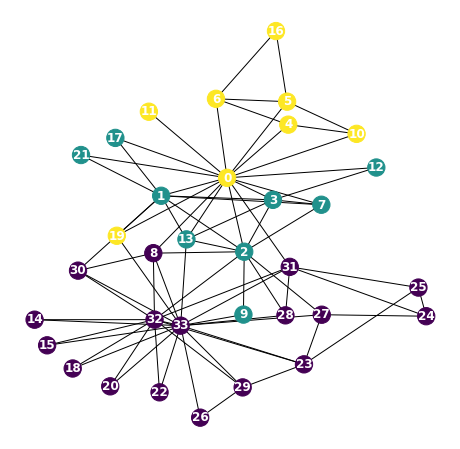

In [4]:
#Draw showing Louvain communities
plt.figure(figsize=(8, 8))
plt.axis('off')
nx.draw_networkx(G, pos=nx.kamada_kawai_layout(G), cmap=plt.cm.viridis, node_color=list(partition.values()),
                 with_labels=True, 
                 font_color='white', font_size= 12, font_weight = "bold")

### Louvain Community Detection
Detect communities using the Louvain method described in: Fast unfolding of communities in large networks, Vincent D Blondel, Jean-Loup Guillaume, Renaud Lambiotte, Renaud Lefebvre, Journal of Statistical Mechanics: Theory and Experiment 2008(10), P10008 (12pp)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 0, 8: 2, 9: 2, 10: 1, 11: 0, 12: 0, 13: 0, 14: 2, 15: 2, 16: 1, 17: 0, 18: 2, 19: 0, 20: 2, 21: 0, 22: 2, 23: 3, 24: 3, 25: 3, 26: 2, 27: 3, 28: 3, 29: 2, 30: 2, 31: 3, 32: 2, 33: 2}


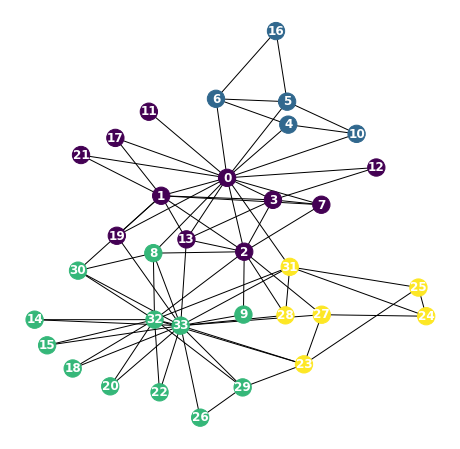

In [5]:
#Consider arc weight, use standard resolution parameter
partition = community.best_partition(G, weight='weight', resolution=1, random_state=140)
print(partition)

#Draw showing Louvain communities
plt.figure(figsize=(8, 8))
plt.axis('off')
nx.draw_networkx(G, pos=nx.kamada_kawai_layout(G), cmap=plt.cm.viridis, node_color=list(partition.values()),
                 with_labels=True, font_color='white', font_size= 12, font_weight = "bold")

The resolution parameter can be adjusted to obtain more (decrease it) or less partitions (increase it).

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 5, 7: 6, 8: 7, 9: 8, 10: 4, 11: 9, 12: 3, 13: 10, 14: 11, 15: 12, 16: 5, 17: 13, 18: 14, 19: 15, 20: 16, 21: 17, 22: 18, 23: 19, 24: 20, 25: 20, 26: 21, 27: 22, 28: 23, 29: 21, 30: 24, 31: 25, 32: 26, 33: 27}


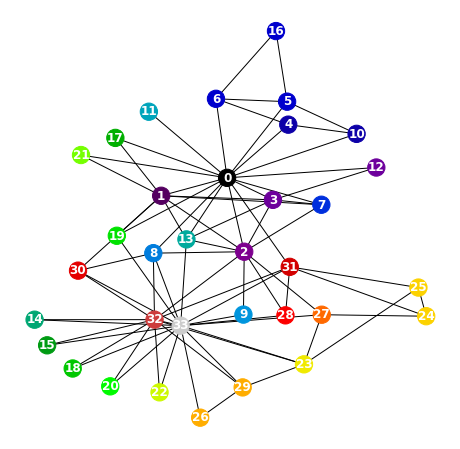

In [6]:
#Consider arc weight, use 0.1 as resolution parameter
partition = community.best_partition(G, weight='weight', resolution=0.1, random_state=140)
print(partition)

#Draw showing Louvain communities
plt.figure(figsize=(8, 8))
plt.axis('off')
nx.draw_networkx(G, pos=nx.kamada_kawai_layout(G), cmap=plt.cm.nipy_spectral, node_color=list(partition.values()),
                 with_labels=True, 
                 font_color='white', font_size= 12, font_weight = "bold")